In [42]:
img= cv2.imread("images/1-Saint-Basils-Cathedral.jpg")

In [43]:
img.shape

(600, 394, 3)

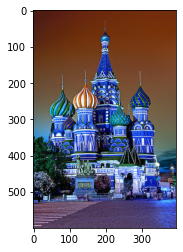

In [44]:
plt.imshow(img)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
img= cv2.imread("bob.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

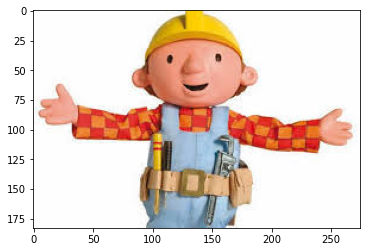

In [69]:
plt.imshow(img)
plt.show()

In [70]:
img.shape

(183, 275, 3)

In [71]:
all_pixels=img.reshape((-1,3))

In [72]:
all_pixels.shape

(50325, 3)

In [73]:
all_pixels.shape

(50325, 3)

In [74]:
from sklearn.cluster import KMeans

In [75]:
k=9
km=KMeans(n_clusters=k)

In [76]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [77]:
km.cluster_centers_

array([[253.32836154, 253.28163942, 252.93074545],
       [219.69332473, 121.59496936,  68.47242825],
       [119.86486486, 134.58708709, 143.14039039],
       [152.88150289, 109.64812139,  68.5484104 ],
       [161.62729913, 187.36915134, 209.52662149],
       [234.74956954, 169.71073273, 142.42012627],
       [230.52678571, 181.59172078,  17.81818182],
       [ 80.2974359 ,  50.24307692,  37.39692308],
       [203.63317937,  51.12817552,  34.62047729]])

In [78]:
centers=np.array(km.cluster_centers_,dtype="uint")

In [79]:
centers

array([[253, 253, 252],
       [219, 121,  68],
       [119, 134, 143],
       [152, 109,  68],
       [161, 187, 209],
       [234, 169, 142],
       [230, 181,  17],
       [ 80,  50,  37],
       [203,  51,  34]], dtype=uint32)

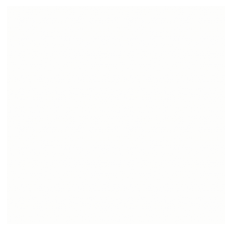

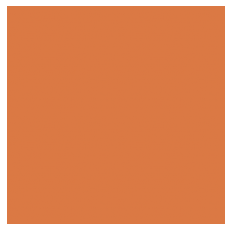

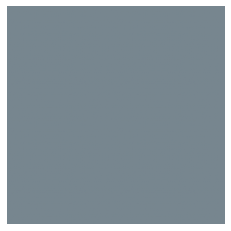

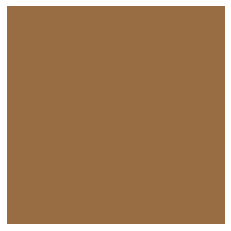

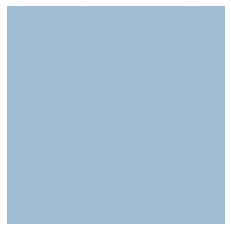

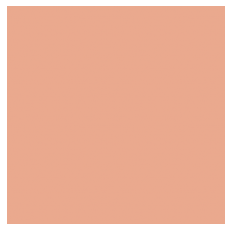

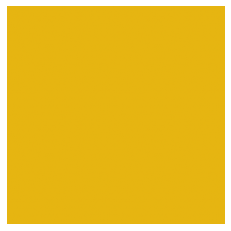

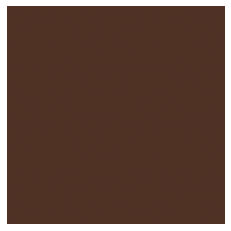

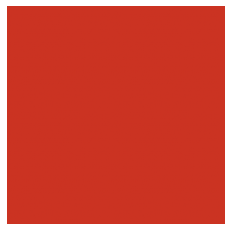

In [80]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [81]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [83]:
new_img.shape


(50325, 3)

In [84]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [85]:
new_img


array([[253, 253, 252],
       [253, 253, 252],
       [253, 253, 252],
       ...,
       [253, 253, 252],
       [253, 253, 252],
       [253, 253, 252]], dtype=uint32)

In [86]:
new_img.shape


(50325, 3)

In [87]:
new_img = new_img.reshape((183,275,3))


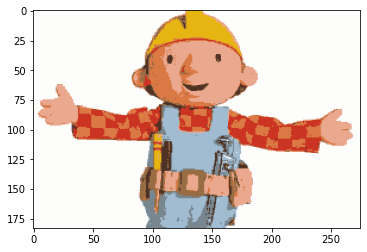

In [88]:
plt.imshow(new_img)
plt.show()

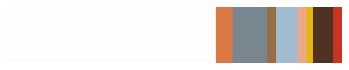

In [89]:
bar = plot_colors(hist, km.cluster_centers_)
# show our color bart
plt.imshow(img)
plt.axis("off")
plt.imshow(bar)
plt.show()

In [55]:
numLabels = np.arange(0, len(np.unique(km.labels_)) + 1)

(hist, _) = np.histogram(km.labels_, bins = numLabels)
# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()
       

In [56]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            #The zip() function returns an 
            #iterator of tuples based on the iterable objects
            # plot the relative percentage of each cluster
            #zip() returns an iterator of 
            #tuples with each tuple having only one element.
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar